Recall that a **categorical variable** is a variable that can take on one of a limited set of values (which are called *levels* or *classes*). Now we will discuss ways to summarize categorical variables. We will use the Titanic data set as a working example. This data set contains information about all of the people who were aboard the RMS Titanic when it sank in 1912, including both passengers and crew. Let's start by reading in this data set.

In [17]:
import pandas as pd

In [18]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,3.0,NaN
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff


Some of the categorical variables in this data set are:
- `gender` (which at the time of data collection was coded as either male or female)
- `class`: what class they were in (1st, 2nd, or 3rd) or what type of crew member they were
- `embarked`: where they embarked (Belfast, Southampton, Cherbourg, or Queenstown)
- `country`: their country of origin
- `ticketno`: the ticket number
- `survived`: whether or not they survived the disaster

Note that `age` and `fare` are quantitative variables. It is tempting to consider `name` a categorical variable, but it is not, since (almost) every person has a unique name. In order for a variable to be categorical, it must take on a reasonably limited set of values, ideally with each level appearing multiple times in the data set. Otherwise, the analyses that we describe in this notebook will not be very meaningful.

Remember that we previously created a few additional categorical variables, like "type" (passenger or crew).

In [19]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger"
})

# Replace all missing values by "crew"
df_titanic["type"].fillna("crew", inplace=True)

# Analyzing One Categorical Variable

In this notebook, we focus on a single categorical variable at a time. For a high-level summary of a categorical variable, we can use the `.describe()` command.

In [20]:
df_titanic["class"].describe()

count     2207
unique       7
top        3rd
freq       709
Name: class, dtype: object

Note that the behavior of `.describe()` will change, depending on whether `pandas` thinks that the variable is quantitative or categorical, which is why it is important to cast categorical variables to the right type. See what happens when we use `describe` on `pclass` (which Pandas thinks is quantitative unless we cast it to the correct type.)

In [21]:
df_titanic["pclass"].describe()

count    1317.000000
mean        2.292331
std         0.836321
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: pclass, dtype: float64

To summarize a single categorical variable, we report each possible level and its **frequency**, that is, the number of observational units with that level of the variable. The command `value_counts` creates a `Series` containing the frequency of each level.

In [22]:
class_counts = df_titanic["class"].value_counts()
class_counts

class
3rd                 709
victualling crew    431
1st                 324
engineering crew    324
2nd                 284
restaurant staff     69
deck crew            66
Name: count, dtype: int64

Does the table look strange? Notice that the levels are sorted in decreasing order of frequency by default. We can also report the levels in the order they appear in the data set...

In [23]:
df_titanic["class"].value_counts(sort=False)

class
3rd                 709
2nd                 284
1st                 324
engineering crew    324
victualling crew    431
restaurant staff     69
deck crew            66
Name: count, dtype: int64

...or in alphabetical order, by sorting the index:

In [24]:
class_counts.sort_index()

class
1st                 324
2nd                 284
3rd                 709
deck crew            66
engineering crew    324
restaurant staff     69
victualling crew    431
Name: count, dtype: int64

Note that this produces a _new_ `Series` with the index sorted. It does not sort the original `Series` `class_counts`. To sort the original series, we need to specify that the sorting should be done "in place", just like we did for `.set_index()` earlier.

In [25]:
class_counts.sort_index(inplace=True)
class_counts

class
1st                 324
2nd                 284
3rd                 709
deck crew            66
engineering crew    324
restaurant staff     69
victualling crew    431
Name: count, dtype: int64

Any other order would require selecting the levels manually, in the desired order.

In [26]:
class_counts.loc[
    ["1st", "2nd", "3rd",
     "deck crew", "engineering crew", "victualling crew",
     "restaurant staff"]
]

class
1st                 324
2nd                 284
3rd                 709
deck crew            66
engineering crew    324
victualling crew    431
restaurant staff     69
Name: count, dtype: int64

This information can be visualized using a **bar chart**.

<Axes: xlabel='class'>

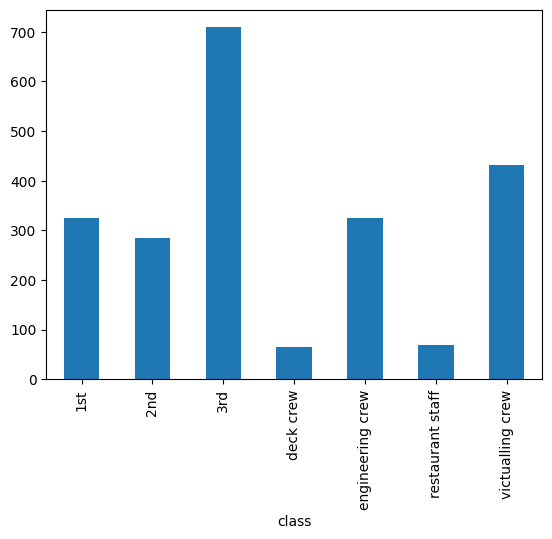

In [27]:
class_counts.plot.bar()

In addition to reporting the frequency (count) for a level, we can also report the **relative frequency**, that is, the *proportion* of observational units with the level of the variable. We can calculate the relative frequencies by specifying `normalize=True` in `.value_counts()`. ("Normalize" here means "rescale the values so that they sum to 1 while maintaining the ratios.")

In [28]:
class_probs = df_titanic["class"].value_counts(normalize=True)
class_probs.sort_index()

class
1st                 0.146806
2nd                 0.128681
3rd                 0.321251
deck crew           0.029905
engineering crew    0.146806
restaurant staff    0.031264
victualling crew    0.195288
Name: proportion, dtype: float64

This is equivalent to taking the counts and dividing by their sum.

In [29]:
class_counts / class_counts.sum()

class
1st                 0.146806
2nd                 0.128681
3rd                 0.321251
deck crew           0.029905
engineering crew    0.146806
restaurant staff    0.031264
victualling crew    0.195288
Name: count, dtype: float64

Notice that the relative frequencies add up to 1.0, by construction. We can report these relative frequencies using probability notation. For example:

$$ P(\text{1st class}) = 0.146806. $$

The complete collection of relative frequencies of all levels of a categorical variable is called the **distribution** of that variable. So the code above calculates the distribution of "class" for those on the Titanic.

The bar chart for relative frequencies looks qualitatively the same as the bar chart for frequencies (i.e., counts). The only difference is that the scale on the vertical axis is different.

<Axes: xlabel='class'>

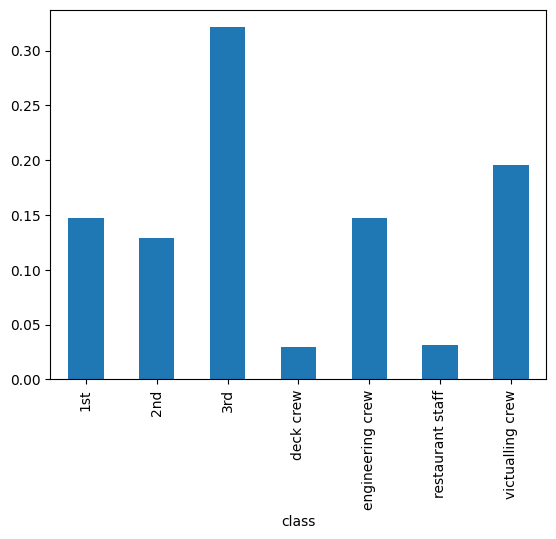

In [30]:
class_probs.sort_index().plot.bar()

It is often more useful to plot the relative frequencies (i.e., proportions) rather than the frequencies (i.e., counts), especially when comparing groups of different sizes.

## Conditional Proportions

What proportion of those coded as males were crew members? To answer questions like this, we have to **filter** the `DataFrame` to include only males. Filtering creates a subset of observations (rows) satisfying some criteria.

The standard way to filter a `DataFrame` is to use a **boolean mask**. A boolean mask is simply a `Series` of booleans (i.e., True/False values) whose index matches the index of the `DataFrame`.

The easiest way to create a boolean mask is to use one of the standard comparison operators `==`, `<`, `>`, and `!=` (not equal) on an existing column in the `DataFrame`. For example, the following code produces a boolean mask that is equal to `True` for the males on the Titanic and `False` otherwise.

In [31]:
df_titanic["gender"] == "male"

0        True
1        True
2        True
3       False
4       False
        ...  
2202     True
2203     True
2204     True
2205     True
2206     True
Name: gender, Length: 2207, dtype: bool

Notice the subtle way the equality operator `==` is being used here! We are comparing an array with a string, i.e.,

\begin{align}
& \begin{bmatrix} \text{"male"} \\ \text{"male"} \\ \text{"male"} \\ \text{"female"} \\ \vdots \\ \text{"male"} \end{bmatrix} & \text{with} & & \text{"male"}.
\end{align}

In most programming languages, this comparison would make no sense. An array of strings is obviously not equal to a string. However, `pandas` automatically applies the equality operator to _each_ element of the array. As a result, we get an entire array (i.e., a `Series`) of booleans.

\begin{align}
 \begin{bmatrix} \text{"male"} \\ \text{"male"} \\ \text{"male"} \\ \text{"female"} \\ \vdots \\ \text{"male"} \end{bmatrix} &== \text{"male"} &\Longrightarrow & &  \begin{bmatrix} \text{True} \\ \text{True} \\ \text{True} \\ \text{False} \\ \vdots \\ \text{True} \end{bmatrix}.
\end{align}


When an operation is applied to each element of an array, it is said to be **broadcast** over that array.

Now, we can use the boolean mask as a filter on the `DataFrame` to extract the rows where the mask equals `True`.

In [32]:
df_male = df_titanic[df_titanic["gender"] == "male"]
df_male

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,S,United States,348122.0,7.13,1,3.0,NaN,passenger
6,"Abelson, Mr. Samuel",male,30.0,2nd,C,France,3381.0,24.00,0,2.0,NaN,passenger
...,...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff,crew


Note that every person in this new `DataFrame` is coded as male. If you inspect the index, you will see that rows 4 and 5 are missing. That is because those passengers were coded as female.

Now we can answer the question: "What proportion of those coded as males were crew members?"

In [33]:
df_male["type"].value_counts(normalize=True)

type
crew         0.504657
passenger    0.495343
Name: proportion, dtype: float64

It appears that about 50.4657% of the males were crew members. We can notate this using _conditional probability_ notation:

$$ P(\text{crew} | \text{male}) = 0.504657. $$

The bar $|$ is read as "given". The information after the bar is the given information. In this case, we were interested in the "probability" a person was a crew member, "given" they were male. That is, after restricting to the male passengers (i.e., using a boolean mask as a filter), we want to know the relative frequency of crew members.

We can also filter on multiple criteria. For example, if we want to know the proportion of male _survivors_ who were crew members, we need to combine two boolean masks, one based on the column `gender` and another based on the column `survived`. The two masks can be combined using the logical operator `&`.

In [34]:
(df_titanic["gender"] == "male") & (df_titanic["survived"] == 1)

0       False
1       False
2       False
3       False
4       False
        ...  
2202     True
2203     True
2204    False
2205    False
2206    False
Length: 2207, dtype: bool

Notice that the logical operator was _broadcast_ (that word again!) over the elements of the two `Series`. In other words, the logical operator was applied to each element, producing a `Series` of booleans.

Now we can use this new boolean mask to filter the `DataFrame`, just as we did before.

In [35]:
df_male_survivors = df_titanic[(df_titanic["gender"] == "male") & (df_titanic["survived"] == 1)]
df_male_survivors

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew,type
5,"Abelseth, Mr. Olaus Jørgensen",male,25.000000,3rd,S,United States,348122.0,7.1300,1,3.0,NaN,passenger
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.000000,3rd,C,Lebanon,2699.0,18.1509,1,3.0,NaN,passenger
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.000000,3rd,S,Finland,3101284.0,7.1806,1,3.0,NaN,passenger
13,"Aks, Master. Frank Philip",male,0.833333,3rd,S,England,392091.0,9.0700,1,3.0,NaN,passenger
22,"Allison, Master. Hudson Trevor",male,0.916667,1st,S,Canada,113781.0,151.1600,1,1.0,NaN,passenger
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,"Windebank, Mr. Alfred Edgar",male,38.000000,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2188,"Witter, Mr. James William Cheetham",male,31.000000,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2200,"Wright, Mr. William",male,40.000000,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2202,"Wynn, Mr. Walter",male,41.000000,deck crew,B,England,NaN,NaN,1,NaN,deck crew,crew


Besides `&`, there are two other logical operators that can be used to modify and combine boolean masks.

- `&` means "and"
- `|` means "or"
- `~` means "not"

Like `&`, the operators `|` and `~` are broadcast over the boolean masks.